### Reflection - Transform image on row axis and column axis.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
imgGray = cv2.imread('/home/thura/Desktop/computer-vision-and-DL/CV-course1/2- 2D-scaling-Transformation/images/albert-einstein-gray.jpg', cv2.IMREAD_GRAYSCALE)

In [13]:
numRows = imgGray.shape[0]
numCols = imgGray.shape[1]

In [19]:
def f_bilinearInterpolate(r, c, I):
    lc = int(c)
    rc = lc + 1
    wr = c - lc
    wl = rc - c
    tr = int(r)
    br = tr + 1
    wt = br - r
    wb = r - tr
    if tr >= 0 and br < I.shape[0] and lc >= 0 and rc < I.shape[1]: # check interpolation pt is in the image
        a = wl * I[tr, lc] + wr * I[tr, rc]
        b = wl * I[br, lc] + wr * I[br, rc]
        g = a * wb + b * wt
        return np.uint8(g)
    else:
        return 0

In [20]:
def f_getExtents(T,rMax,cMax):
    Cords = np.array([[0,0],[0,cMax-1],[rMax-1,0],[rMax-1,cMax-1]])
    A_dash = T.dot(Cords.T)
    mins = A_dash.min(axis=1)
    maxs = A_dash.max(axis=1)
    minR = np.int64(np.floor(mins[0]))
    minC = np.int64(np.floor(mins[1]))
    maxR = np.int64(np.ceil(maxs[0]))
    maxC = np.int64(np.ceil(maxs[1]))
    H,W = maxR-minR+1, maxC-minC+1
    return minR,minC,maxR,maxC,H,W

In [21]:
def f_transform(T,I_gray):
    rMax,cMax = I_gray.shape[0],I_gray.shape[1]
    minR,minC,maxR,maxC,H,W = f_getExtents(T,rMax,cMax)
    I2 = np.zeros((H,W),dtype='uint8')
    Tinv = np.linalg.inv(T)
    for new_i in range(minR,maxR):
        for new_j in range(minC,maxC):
            P_dash = np.array([new_i,new_j])
            P = Tinv.dot(P_dash)
            i , j = P[0] , P[1]
            if i < 0 or i>=numRows or j<0 or j>=numCols:
                pass
            else:
                g = f_bilinearInterpolate(i,j,I_gray)
                I2[new_i-minR,new_j-minC] = g
    return I2

In [22]:
T = np.array([[-1, 0], [0, 1]])

In [30]:
T

array([[-1,  0],
       [ 0,  1]])

In [35]:
T.dtype

dtype('int64')

In [25]:
I = f_transform(T, imgGray)

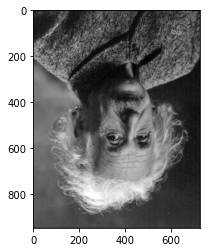

In [26]:
plt.imshow(I, cmap='gray')

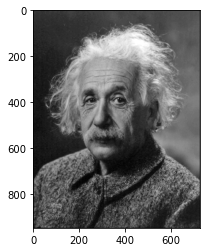

In [28]:
T2 = np.array([[1, 0], [0, -1]])
I2 = f_transform(T2, imgGray)
plt.imshow(I2, cmap='gray')

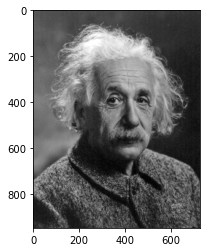

In [29]:
plt.imshow(imgGray, cmap='gray')

## Quiz 01
Reflect image by transformation on ROW or COL by user input of desired type.

Enter Transformation/Reflection Type -> row OR col: row


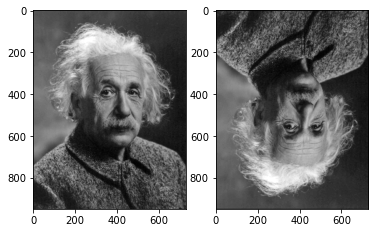

In [46]:
T_row = np.array([[-1, 0], [0, 1]])
T_col = np.array([[1, 0], [0, -1]])

transform = {
    'row' : T_row,
    'col' : T_col
}

TransformType = input("Enter Transformation/Reflection Type -> row OR col: ")
Img = f_transform(transform[TransformType], imgGray)

plt.subplot(121)
plt.imshow(imgGray, cmap='gray')
plt.subplot(122)
plt.imshow(Img, cmap='gray')

## Quiz 02
Can you perform reflection using OpenCV in Python?

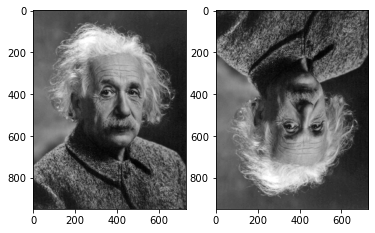

In [49]:
Img_flip = cv2.flip(imgGray, 0) # 0 for x-axis, 1 for y-axis

plt.subplot(121)
plt.imshow(imgGray, cmap='gray')
plt.subplot(122)
plt.imshow(Img_flip, cmap='gray')